# Performance Metrics

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    max_error, r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
    classification_report,
    precision_recall_curve,
    PrecisionRecallDisplay,
    roc_curve,
    roc_auc_score
)

## Regression metrics

เราสามารถประเมิน performance ของ regression task ได้ดังนี้

### Distance measures

วัดระยะห่างระหว่าง $y$ กับ $\hat{y}$

<img src="../images/distance_measures.png" width="500" /><br />

### Errors

- <b>Mean Squared Error</b> (MSE)
    - ใช้ `sklearn.metrics.mean_squared_error` 

$$\text{MSE} = {\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$
    
- <b>Root Mean Squared Error</b> (RMSE) 

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$
    
- <b>Mean Absolute Error</b> (MAE)
    - ใช้ `sklearn.metrics.mean_absolute_error`
    - Less sensitive to outliers

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$
        
- <b>Max Error</b> (ME)
    - ใช้ `sklearn.metrics.max_error` 

$$\text{ME} = \max_{i=1}^{n} |y_i - \hat{y}_i|$$
    
- <b>Coefficient of determination</b> ($R^2$)
    - ใช้ `sklearn.metrics.r2_score`
    - มีค่าระหว่าง 1 ถึง $-\infty$ (ไม่มีหน่วย)

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \overline{y})^2}$$

How to choose the right regression error?
- Use $\text{MSE}$ when you need to penalize large errors / sign of error not important
- Use $\text{RMSE}$ when you want to penalize large errors, but see it in the unit of the target.
- Use $\text{MAE}$ when all errors, large or small, have equal importance.
- Use $\text{ME}$ when you want to limit the magnitude of the errors.
- Use $R^{2}$ when you want a general/comparable performance metric / units not required.

In [2]:
# Perform data pre-processing

# Import data and drop duplicate
data = pd.read_csv('../data/fish.csv').drop_duplicates()
# Prepare X and y
X = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = data['Weight']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)
# Scale features
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Predict by linear regression
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [3]:
# Compute regression error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
rsquared = r2_score(y_test, y_pred)
max_error = max_error(y_test, y_pred)
print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('Max Error =', round(max_error, 2))
print('R2 =', round(rsquared, 2))

MSE = 16217.63
RMSE = 127.35
MAE = 95.58
Max Error = 282.65
R2 = 0.87


ขนาดของ error จะขึ้นกับหน่วยด้วย ไม่มี standardised value (ยกเว้น $R^2$)

metric ใช้ใน cross validation ได้ โดยกำหนดใน `scoring`

In [4]:
# 5-Fold cross validation
metrics = ['max_error', 'r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
cv_results = cross_validate(LinearRegression(), X_train, y_train, cv=5, scoring=metrics)
pd.DataFrame(cv_results)

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.003011,0.003000,-336.080723,0.840449,-89.720506,-15567.300902
1,0.002002,0.002998,-423.829702,0.879118,-115.563939,-23011.831620
2,0.002002,0.003000,-396.512088,0.919412,-74.969312,-11763.339562
3,0.003000,0.002011,-316.379705,0.852831,-104.515769,-18943.822954
4,0.001484,0.003012,-234.342973,0.809597,-102.697382,-13985.709798


## Classification metrics

เราใช้ confusion matrix ในการประเมิน performance ของ classification task

<b>Confusion matrix</b> เป็นผลการทำนายของ classification task มีสมาชิกที่เป็นจำนวนหรือสัดส่วนการทำนายที่ถูกต้อง (อยู่ใน diagonal) และที่ไม่ถูกต้อง สร้างได้โดยใช้ `sklearn.metrics.ConfusionMatrixDisplay`

สำหรับ binary classification (การจำแนกระหว่าง negative (Class 0) กับ positive (Class 1)) จะมี confusion matrix ลักษณะดังนี้
- TN = True negative = ข้อมูลที่ถูกทำนายได้ถูกต้องว่าเป็น negative 
- FN = False negative = ข้อมูลที่ถูกทำนายผิดจาก positive เป็น negative (Type I error) 
- TP = True positive = ข้อมูลที่ถูกทำนายได้ถูกต้องว่าเป็น positive 
- FP = False positive = ข้อมูลที่ถูกทำนายผิดจาก negative เป็น positive (Type II error)

<img src="../images/binary_confusion_matrix.png" width="400" /><br />

Metric ที่หาได้จาก confusion matrix เช่น

- <b>Accuracy</b> 
    - ใช้ `sklearn.metrics.accuracy_score`
    - บอกสัดส่วนการทำนายที่ถูกต้องของ model
    - ใช้เมื่อทุก class สำคัญ และข้อมูลที่อยู่ในแต่ละ class มีความ balanced (ปริมาณใกล้เคียงกัน) 
    - หากข้อมูลไม่ balanced จะได้ค่า accuracy ที่ดีเกินจริง

$$\text{accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$

- <b>Recall</b> = True positive rate = Sensitivity
    - ใช้ `sklearn.metrics.recall_score`
    - บอกสัดส่วนของ positive ที่ model เจอ
    - ใช้เมื่อเราต้องการให้ model ตรวจเจอข้อมูลใน class ๆ หนึ่งให้มากที่สุด

$$\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

- <b>Precision</b> 
    - ใช้ `sklearn.metrics.precision_score`
    - บอกความสามารถของ model ในการระบุ positive อย่างถูกต้อง
    - ใช้เมื่อเราให้ความสำคัญกับการระบุ positive

$$\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

- <b>$F_1$-score</b>
    - ใช้ `sklearn.metrics.f1_score`
    - บ่งบอกความสามารถของ model ในการตรวจเจอ positive โดยทำให้ FP น้อยที่สุด
    - ใช้เป็น metric เทียบกับ model อื่นหรือใช้ dataset อื่น

$$F_1 = 2 \times \frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}}$$

- <b>Specificity</b>
    - มีค่าเท่ากับ recall

$$\text{specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}$$

- <b>False positive rate</b>
    - มีค่าเท่ากับ 1-Specificity

$$\text{false positive rate} = \frac{\text{FP}}{\text{TN} + \text{FP}}$$

In [5]:
# Perform data pre-processing

# Import data and drop duplicate
data = pd.read_csv('../data/wines_binary.csv').drop_duplicates()
# Prepare X and y
X, y = data.drop(columns=['is_good_quality']), data['is_good_quality']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)
# Scale features
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
# Predict by logistic regression
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)

In [7]:
# Compute classification metrics
print('Accuracy =', round(accuracy_score(y_test, y_pred_lr), 2))
print('Precision =', round(precision_score(y_test, y_pred_lr), 2))
print('Recall =', round(recall_score(y_test, y_pred_lr), 2))
print('F1 score =', round(f1_score(y_test, y_pred_lr), 2))

Accuracy = 0.86
Precision = 0.88
Recall = 0.84
F1 score = 0.86


In [8]:
# 5-Fold cross validation
metrics = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(LogisticRegression(), X_train, y_train, cv=5, scoring=metrics)
pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.107733,0.029072,0.857571,0.868949,0.841864,0.855192
1,0.094324,0.028136,0.861929,0.875724,0.843294,0.859203
2,0.099524,0.029431,0.861714,0.874667,0.844152,0.859139
3,0.101598,0.030288,0.861429,0.871489,0.847562,0.859359
4,0.106469,0.028872,0.859643,0.873108,0.841270,0.856893


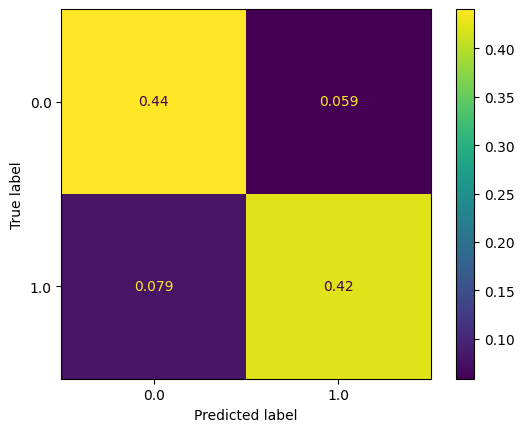

In [9]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, normalize="all");

In [10]:
# Predict by KNN
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)

In [11]:
# Compute classification metrics
print('Accuracy =', round(accuracy_score(y_test, y_pred_knn), 2))
print('Precision =', round(precision_score(y_test, y_pred_knn), 2))
print('Recall =', round(recall_score(y_test, y_pred_knn), 2))
print('F1 score =', round(f1_score(y_test, y_pred_knn), 2))

Accuracy = 0.91
Precision = 0.92
Recall = 0.91
F1 score = 0.91


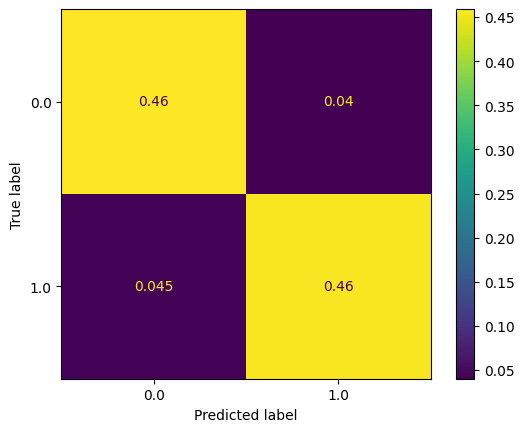

In [12]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, normalize="all");

In [13]:
# Cross-validation and classification report
results = cross_val_predict(knn, X_train, y_train)
pd.DataFrame(classification_report(y_train, results, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.909194,0.914185,0.911671,0.911689,0.911687
recall,0.914878,0.908459,0.911671,0.911668,0.911671
f1-score,0.912027,0.911313,0.911671,0.911670,0.911670
support,35032.000000,34968.000000,0.911671,70000.000000,70000.000000


## Precision-recall curve

สำหรับ binary classification task 
- Precision กับ recall มีความสัมพันธ์แบบ inverse relationship
- เราใช้ precision-recall curve เพื่อเปรียบเทียบ precision กับ recall ที่ threshold ต่าง ๆ
- เราสามารถสร้าง precision-recall curve โดยใช้ `sklearn.metrics.precision_recall_curve` และ `sklearn.metrics.PrecisionRecallDisplay`

classification task ที่เราทำมาด้านบน มี precision-recall curve เป็นดังภาพ (model มี threshold = 0.5 (by default))

<img src="../images/precision_recall_curve_thr_0.5.png" width="500" /><br />

หากต้องการพัฒนา model ให้มี precision/recall เพิ่มขึ้น เราสามารถปรับ threshold ได้ เช่น ถ้าเราต้องการให้ model มี precision มากกว่า 90% เราต้องปรับ threshold ให้มากกว่า 0.57 ดังภาพ

<img src="../images/precision_recall_curve_thr_0.57.png" width="500" /><br />

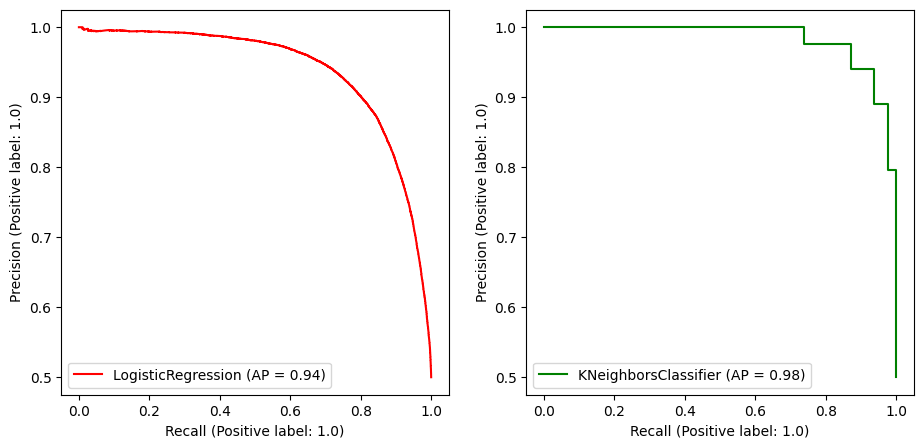

In [14]:
# Plot precision-recall curve for the "lr" and "knn" models
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
PrecisionRecallDisplay.from_estimator(lr, X_train, y_train, ax=axs[0], color='r')
PrecisionRecallDisplay.from_estimator(knn, X_train, y_train, ax=axs[1], color='g');

In [15]:
# Show threshold corresponding to each (recall, precision) coordinate for the "lr" model
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_test, y_prob_lr[:, 1])
prc_df_lr = pd.DataFrame({
    "Precision": precisions_lr[:-1],
    "Recall": recalls_lr[:-1],
    "Threshold": thresholds_lr,
}).sort_values('Precision')
prc_df_lr

,Precision,Recall,Threshold
0,0.500733,1.000000,0.000042
1,0.500750,1.000000,0.000064
2,0.500767,1.000000,0.000091
3,0.500783,1.000000,0.000103
4,0.500800,1.000000,0.000118
...,...,...,...
29961,1.000000,0.002596,0.999967
29962,1.000000,0.002530,0.999968
29963,1.000000,0.002463,0.999968
29949,1.000000,0.003395,0.999959


In [16]:
# Show the dataframe where precision > 90%
prc_df_lr[prc_df_lr['Precision'] >= 0.9]

,Precision,Recall,Threshold
16450,0.900000,0.811809,0.570544
16449,0.900007,0.811876,0.570502
16448,0.900015,0.811942,0.570414
16455,0.900037,0.811543,0.571219
16454,0.900044,0.811610,0.570866
...,...,...,...
29961,1.000000,0.002596,0.999967
29962,1.000000,0.002530,0.999968
29963,1.000000,0.002463,0.999968
29949,1.000000,0.003395,0.999959


In [17]:
# Find the lowest threshold with the precision at least 90%
new_threshold_lr_index = prc_df_lr[prc_df_lr['Precision'] >= 0.9].index[0]
new_threshold_lr = thresholds_lr[new_threshold_lr_index]
new_threshold_lr

0.5705443272071143

In [18]:
# Make new predictions using the "lr" model with the new threshold
new_y_pred_lr = []
for proba_0, proba_1 in y_prob_lr:
    if proba_1 >= new_threshold_lr:
        new_y_pred_lr.append(1)
    else:
        new_y_pred_lr.append(0)
precision_score(y_test, new_y_pred_lr)  # new precision score

0.9

In [19]:
# Show threshold corresponding to each (recall, precision) coordinate for the "knn" model
precisions_knn, recalls_knn, thresholds_knn = precision_recall_curve(y_test, y_prob_knn[:, 1])
prc_df_knn = pd.DataFrame({
    "Precision": precisions_knn[:-1],
    "Recall": recalls_knn[:-1],
    "Threshold": thresholds_knn,
}).sort_values('Precision')
prc_df_knn

,Precision,Recall,Threshold
0,0.500733,1.000000,0.0
1,0.774774,0.980562,0.2
2,0.868049,0.952936,0.4
3,0.918868,0.909999,0.6
4,0.955386,0.842498,0.8
5,0.978801,0.716150,1.0


In [20]:
# Show the dataframe where precision > 90%
prc_df_knn[prc_df_knn['Precision'] >= 0.9]

,Precision,Recall,Threshold
3,0.918868,0.909999,0.6
4,0.955386,0.842498,0.8
5,0.978801,0.716150,1.0


In [21]:
# Find the lowest threshold with the precision at least 90%
new_threshold_knn_index = prc_df_knn[prc_df_knn['Precision'] >= 0.9].index[0]
new_threshold_knn = thresholds_knn[new_threshold_knn_index]
new_threshold_knn

0.6

In [22]:
# Make new predictions using the "knn" model with the new threshold
new_y_pred_knn = []
for proba_0, proba_1 in y_prob_knn:
    if proba_1 >= new_threshold_knn:
        new_y_pred_knn.append(1)
    else:
        new_y_pred_knn.append(0)
precision_score(y_test, new_y_pred_knn)  # new precision score

0.9188680513544397

## Receiver-Operator Curve Area Under the Curve (ROC-AUC)

หากต้องการคำนวณหรือเปรียบเทียบ performance ของแต่ละ classifier เราไม่สามารถใช้ precision/recall/accuracy ได้ เพราะ performance เปลี่ยนตาม threshold แต่เราจะใช้ <b>receiver-operator curve (ROC)</b> ซึ่งเป็น plot ระหว่าง true positive rate (TPR) กับ false positive rate (FPR)

<img src="../images/roc1.png" width="250" /><br />

พิจารณาภาพด้านบน
- เส้นทึบ เป็น ROC ของ random classifier
- เราต้องการ classifier ที่มีเส้น ROC (เส้นประ) อยู่เหนือเส้น ROC ของ random classifier มากที่สุด
- ความชันของ ROC ($m_{\text{ROC}}=\frac{\text{TPR}}{\text{FPR}}$) เปลี่ยนตาม threshold
- แต่พื้นที่ใต้ ROC (<b>Area Under the Curve, AUC</b>) ไม่ขึ้นกับ threshold จึงใช้เปรียบเทียบ performance ของแต่ละ classifier ได้ โดย classifier ที่มี AUC มากกว่าจะมี performance ดีกว่า
- ROC สร้างได้โดยใช้ `sklearn.metrics.roc_curve`
- AUC หาได้โดยใช้ `sklearn.metrics.roc_auc_score`

ภาพด้านล่างแสดง ROC หลาย ๆ แบบ

<img src="../images/roc2.png" width="250" /><br />

ภาพด้านล่างแสดง threshold ที่ดีที่สุดที่จะหาได้จาก ROC

<img src="../images/roc3.png" width="400" /><br />


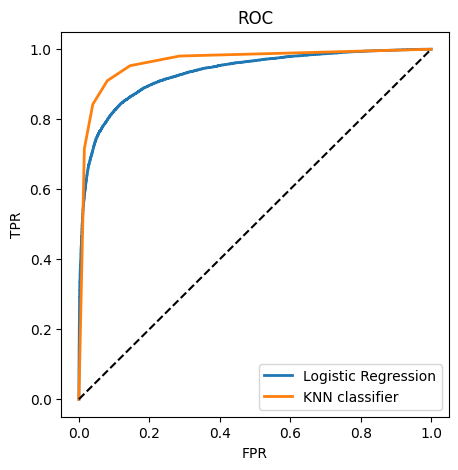

In [23]:
# Create ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr[:, 1], drop_intermediate=False)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn[:, 1], drop_intermediate=False)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(fpr_lr, tpr_lr, label='Logistic Regression', linewidth=2)
ax.plot(fpr_knn, tpr_knn, label='KNN classifier', linewidth=2)
ax.plot(np.linspace(0, 1, 5), np.linspace(0, 1, 5), color='k',linestyle='--')
ax.set(xlabel='FPR', ylabel='TPR', title='ROC')
ax.legend();

In [24]:
# Compute AUC score
print("AUC score of the logistic regression model =", roc_auc_score(y_test, y_pred_lr))
print("AUC score of the KNN model =", roc_auc_score(y_test, y_pred_knn))

AUC score of the logistic regression model = 0.8627286958252834
AUC score of the KNN model = 0.9147069054139655
